In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
import logging
from math import sqrt, ceil
from PIL import Image

import random
import seaborn as sns
import matplotlib.pyplot as plt

from create_dataset import load_data, array_to_image, enlarge_image_and_dataframe, array_to_grayscale_image
from MCAgent import MCAgent

In [2]:
def array_to_label(array):
    label = np.full(169, " ", dtype="S6")
    p = 0
    for i in range(18):
        for j in range(i+1, 18):
            if array[j] != 0:
                # print(label[p].dtype)
                label[p] = "X{}/X{}".format(i+1, j+1)
                p+=1
    label = label.reshape(13, 13)
    return label

# array_to_label(np.ones(169)).reshape(-1)[:153]

In [3]:
def df_processing(df):
    # Find the oldest year for each company
    oldest_years = df.groupby('company_name')['year'].min()
    
    # Filter companies that are alive in the oldest year
    df = pd.merge(df, oldest_years, on=['company_name', 'year'], how='inner')
    df = df[(df['status_label'] == 1)]
    df = df.drop(columns=['company_name', 'status_label', 'year'])

    return df

In [4]:
# # image data path
# DATAPATH = r'american_bankruptcy.csv'

# logging.basicConfig(level=logging.INFO)
# df = load_data(DATAPATH)
# df = df_processing(df)
# df.to_csv("Processed_df.csv")

In [5]:
df = pd.read_csv("Processed_df.csv")
# Calculate the average based on the oldest year
df_mean = pd.DataFrame(df.mean()).T
data = df_mean.iloc[0].to_numpy()

In [6]:
def ratios_dataframe(df):
    # convert the dataframe to ratios
    ratios = array_to_label(np.ones(169)).reshape(-1)[:153]
    ratios_df = pd.DataFrame()
    for i in range(18):
        for j in range(i+1, 18):
            ratios_df["X{}/X{}".format(i+1, j+1)] = df["X{}".format(i+1)] / df["X{}".format(j+1)]
    return ratios_df

ratios_df = ratios_dataframe(df)
print(ratios_df.head())

      X1/X2      X1/X3      X1/X4     X1/X5       X1/X6     X1/X7     X1/X8  \
0  0.710583  10.336945  11.399044  1.683607   93.539216  4.128516  0.911797   
1  1.218369  15.002976   6.004765  5.923619    9.484478  4.506929  0.458456   
2  0.551345  43.649718   4.162716  1.970416    4.066316  2.857249  0.391055   
3  0.934438   7.705834   4.368955  2.167946   -2.135345  2.966014  0.750668   
4  0.363932  14.306818   7.476633  2.645200 -209.833333  1.822341  4.672594   

      X1/X9    X1/X10     X1/X11  ...   X14/X15   X14/X16   X14/X17   X14/X18  \
0  0.598444  0.629769  11.224706  ...  0.682232  0.258421  0.615017  0.272739   
1  0.762517  0.571283   5.025922  ... -1.057787  0.358569  0.626123  0.410725   
2  0.333953  0.947627        inf  ... -0.477167  0.145883  0.967049  0.158607   
3  0.501741  0.335392  67.207200  ... -5.598909  0.776724  0.928768  0.877498   
4  0.269844  0.686022  48.996616  ... -1.199886  0.371214  0.759442  0.385114   

    X15/X16   X15/X17   X15/X18   X16/

/var/folders/3r/s8rh15kn143b2zw160ckyhnw0000gn/T/ipykernel_8725/870662572.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratios_df["X{}/X{}".format(i+1, j+1)] = df["X{}".format(i+1)] / df["X{}".format(j+1)]
/var/folders/3r/s8rh15kn143b2zw160ckyhnw0000gn/T/ipykernel_8725/870662572.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratios_df["X{}/X{}".format(i+1, j+1)] = df["X{}".format(i+1)] / df["X{}".format(j+1)]
/var/folders/3r/s8rh15kn143b2zw160ckyhnw0000gn/T/ipykernel_8725/870662572.py:7: PerformanceWarning: DataFrame 

In [11]:
labels = array_to_label(data)
print(labels.shape)

mc_agent = MCAgent(ratios_df, labels)
new_labels, pixels = mc_agent.monte_carlo_simulation()


(13, 13)
Start monte_carlo_simulation
N ratios:  153
Iteration: 100, Energy: 26147.015470846727
Iteration: 200, Energy: 26147.015470846698
Iteration: 300, Energy: 26147.01547084668
Iteration: 400, Energy: 26147.015470846698
Iteration: 500, Energy: 26147.01547084666
Iteration: 600, Energy: 26147.01547084663
Iteration: 700, Energy: 26147.015470846534
Iteration: 800, Energy: 26147.015470846534
Iteration: 900, Energy: 26147.015470846534
Iteration: 1000, Energy: 26147.015470846512
Iteration: 1100, Energy: 26147.01547084653
Iteration: 1200, Energy: 26147.015470846516
Iteration: 1300, Energy: 26147.015470846552
Iteration: 1400, Energy: 26147.01547084652
Iteration: 1500, Energy: 26147.015470846538
Iteration: 1600, Energy: 26147.01547084651
Iteration: 1700, Energy: 26147.015470846487
Iteration: 1800, Energy: 26147.015470846494
Iteration: 1900, Energy: 26147.01547084649
Iteration: 2000, Energy: 26147.015470846487


In [13]:
def enlarge_image(image_array, new_size=(64, 64)):
    """
    Enlarge an 13x13 image and a corresponding 13x13 dataframe to 64x64 using nearest neighbor method.

    Args:
    image_array (numpy.ndarray): An 13x13 numpy array representing the image.
    new_size (tuple): New size for the image and dataframe, default is (64, 64).

    Returns:
    numpy array: a numpy array of the enlarged image
    """
    if image_array.shape != (13, 13):
        raise ValueError("Input image array and dataframe must be 13x13 in size.")

    # Enlarge the image array
    image_pil = Image.fromarray(image_array)
    enlarged_image_pil = image_pil.resize(new_size, Image.NEAREST)
    enlarged_image_array = np.array(enlarged_image_pil)

    return enlarged_image_array

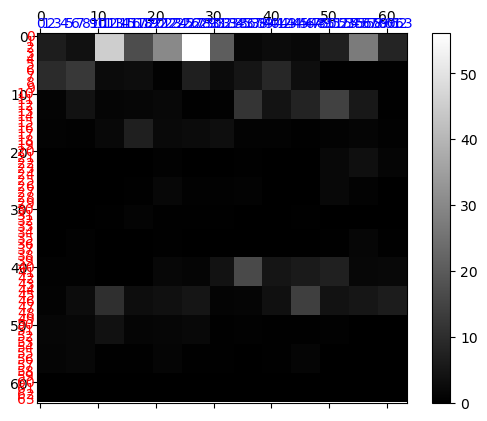

In [14]:
image = array_to_image(data)
enlarged_image = enlarge_image(image)
fig = array_to_grayscale_image(enlarged_image)

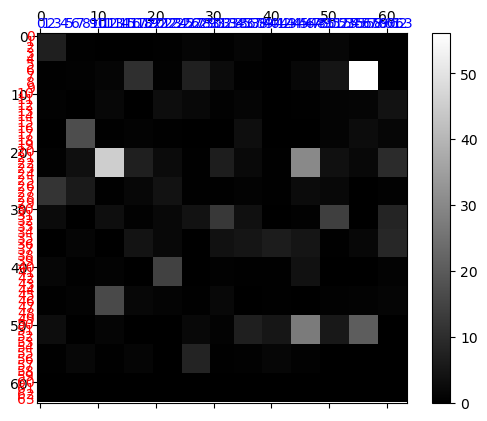

In [17]:
def rearrange_image(image, pixels):
    image = image.reshape(-1)
    new_image = np.zeros(image.size)
    for i, pixel in enumerate(pixels):
        new_image[i] = image[pixel]
    return new_image.reshape(13, 13)
    
new_image = rearrange_image(image, pixels)
enlarged_image = enlarge_image(new_image)
fig = array_to_grayscale_image(enlarged_image)

test for modified create_dataset()

In [2]:
from create_dataset import create_dataset

DATAPATH = r'american_bankruptcy.csv'

bankrupt_data = load_data(DATAPATH)
dataset = create_dataset(bankrupt_data)

100%|██████████| 24221/24221 [00:18<00:00, 1286.66it/s]


In [ ]:
for i, (data, s) in enumerate(dataset[:5]):
    print("i:{}, status: {}".format(i, s))
    fig = array_to_grayscale_image(data.reshape(64, 64))
    plt.show()

### Oversample the dataset (as we have an extremely unbalanced dataset)

In [6]:
DATAPATH = r'american_bankruptcy.csv'
bankrupt_data = load_data(DATAPATH) # this load_data is the version before modification

100%|██████████| 8971/8971 [01:31<00:00, 98.46it/s] 


In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X, y = bankrupt_data.drop(columns=['company_name', 'year', 'status_label']), bankrupt_data['status_label'] 
# print(X.head())
print("Original dataset shape: %s", Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s', Counter(y_res))

X_res['status_label'] = y_res
print(X_res['status_label'].describe())

Original dataset shape: %s Counter({1: 22453, 0: 1768})
Resampled dataset shape %s Counter({1: 22453, 0: 22453})
count    44906.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: status_label, dtype: float64
